### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands.
   
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bike=pd.read_csv('day.csv')

### Inspect Data

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
### From the above information we can see dteday field is object.Need to convert that.
### Here dteday is in format dd-mm-yyyy. Converting the change accordingly.

bike['dteday']=pd.to_datetime(bike['dteday'],format="%d-%m-%Y")

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

### Missing Values and Outliners Check

In [7]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
### Creating a new field day_of_the_week
bike['day_of_the_week']=bike['dteday'].dt.day_name()

In [9]:
bike['day_of_the_week']=bike['day_of_the_week'].astype(str)

In [10]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_the_week
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,Monday
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,Tuesday
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,Wednesday
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,Thursday
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,Friday


In [11]:
bike.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2018-12-31 12:00:00,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
min,1.000000,2018-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2018-07-02 06:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,2018-12-31 12:00:00,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,2019-07-01 18:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,2019-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647


In [12]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          730 non-null    int64         
 1   dteday           730 non-null    datetime64[ns]
 2   season           730 non-null    int64         
 3   yr               730 non-null    int64         
 4   mnth             730 non-null    int64         
 5   holiday          730 non-null    int64         
 6   weekday          730 non-null    int64         
 7   workingday       730 non-null    int64         
 8   weathersit       730 non-null    int64         
 9   temp             730 non-null    float64       
 10  atemp            730 non-null    float64       
 11  hum              730 non-null    float64       
 12  windspeed        730 non-null    float64       
 13  casual           730 non-null    int64         
 14  registered       730 non-null    int64    

### Data Cleaning

In [13]:
### A day cannot be simultaneously a workingday and holiday both.
### Checking the sanity of data.

bike[(bike['workingday']==1) & (bike['holiday']==1)].value_counts().sum()

0

### EDA

### Plot agains categorical variables

In [14]:
### plot dteday vs cnt

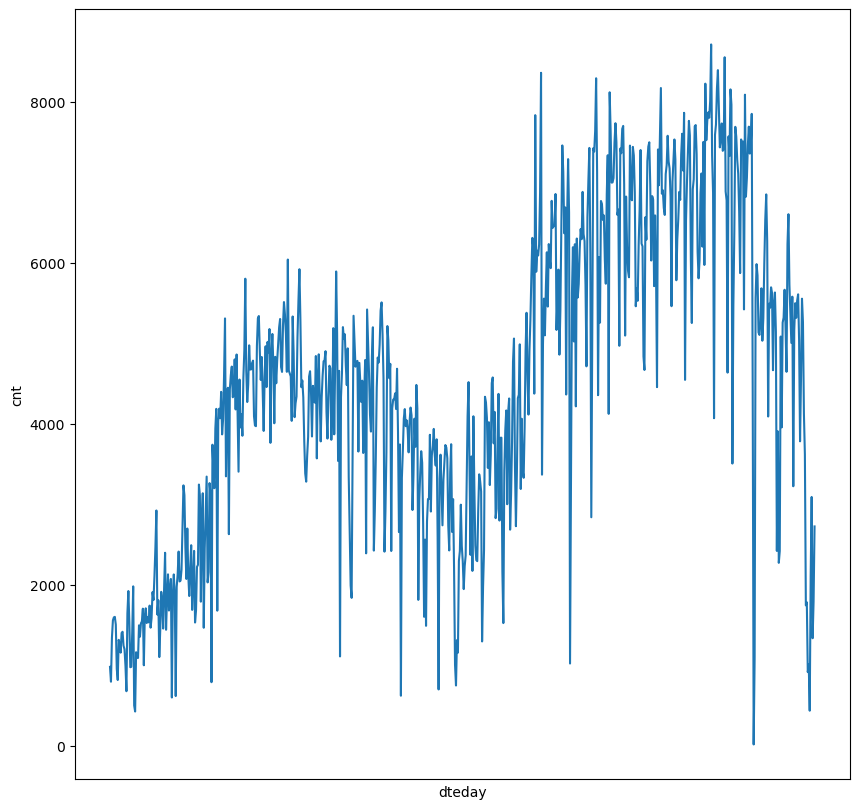

In [15]:
plt.figure(figsize=(10,10))
sns.lineplot(x='dteday',y='cnt',data=bike)
plt.xticks([])
plt.show()

In [16]:
### Getting some periodic spike. Observing some pattern which need to be identified.

In [17]:
### plot day_of_the_week vs cnt

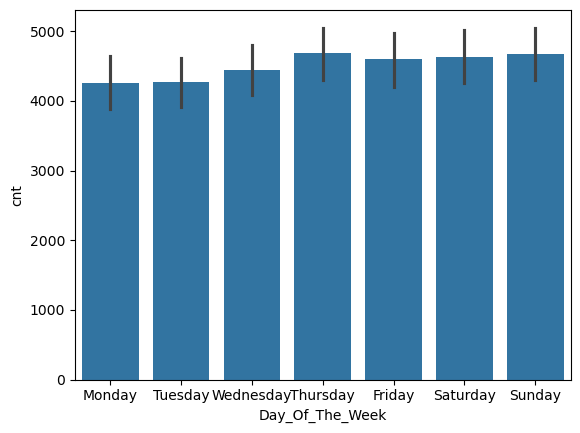

In [18]:
sns.barplot(x='day_of_the_week',y='cnt',data=bike)
plt.xlabel('Day_Of_The_Week')
plt.show()

In [19]:
### cnt is highest on Thursday and lowest on Monday and Tuesday. Though there is no significant difference between highest and lowest value.
### If we check the values it will be like below

In [20]:
bike.groupby(bike['day_of_the_week']).mean()['cnt']

day_of_the_week
Friday       4597.423077
Monday       4259.819048
Saturday     4626.692308
Sunday       4665.721154
Thursday     4691.567308
Tuesday      4274.495238
Wednesday    4444.961538
Name: cnt, dtype: float64

In [21]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          730 non-null    int64         
 1   dteday           730 non-null    datetime64[ns]
 2   season           730 non-null    int64         
 3   yr               730 non-null    int64         
 4   mnth             730 non-null    int64         
 5   holiday          730 non-null    int64         
 6   weekday          730 non-null    int64         
 7   workingday       730 non-null    int64         
 8   weathersit       730 non-null    int64         
 9   temp             730 non-null    float64       
 10  atemp            730 non-null    float64       
 11  hum              730 non-null    float64       
 12  windspeed        730 non-null    float64       
 13  casual           730 non-null    int64         
 14  registered       730 non-null    int64    

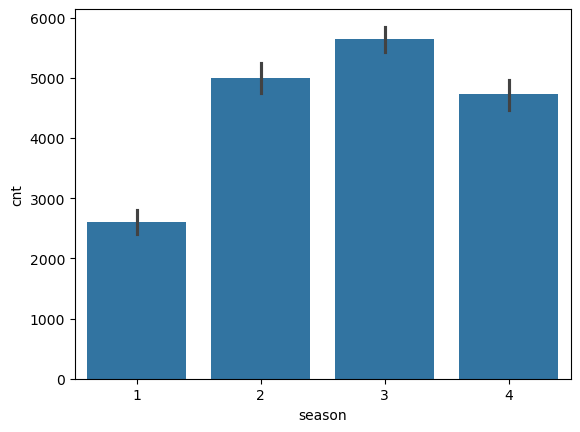

In [22]:
### plot season vs cnt
sns.barplot(x='season',y='cnt',data=bike)
plt.show()

In [23]:
###1:spring, 2:summer, 3:fall, 4:winter
### During fall cnt is highest followed by summer,winter and spring. Spring has lowest cnt.

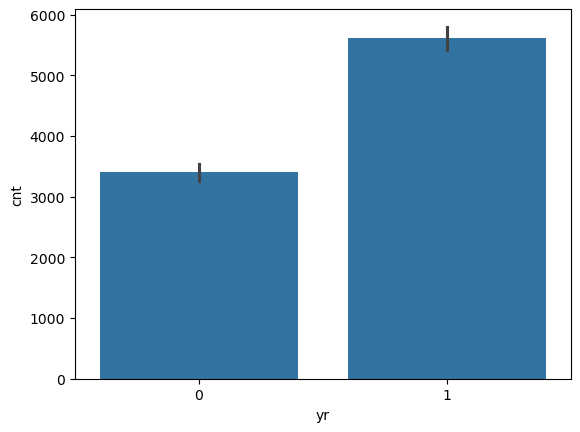

In [24]:
### plot yr vs cnt
sns.barplot(x='yr',y='cnt',data=bike)
plt.show()

In [25]:
### There is sigficant rise of cnt in 2019 compared to 2018

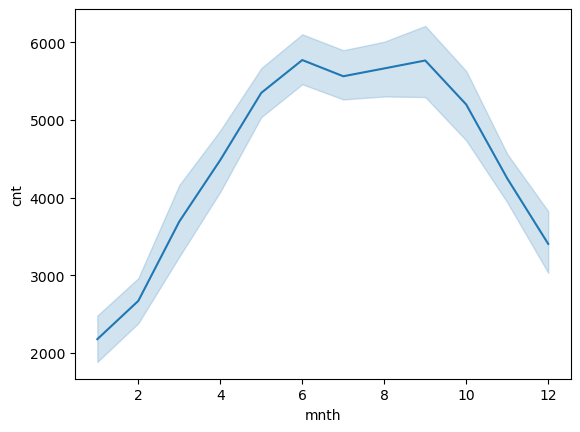

In [26]:
### plot mnth vs cnt
sns.lineplot(x='mnth',y='cnt',data=bike)
plt.show()

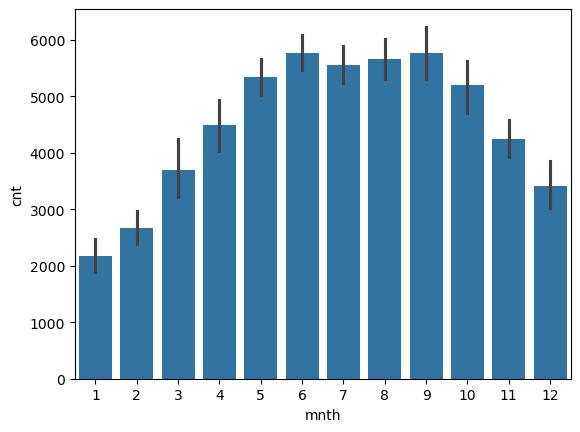

In [27]:
sns.barplot(x='mnth',y='cnt',data=bike)
plt.show()

In [28]:
### cnt seems to be rise from January to August.  Then again we are observing a fall in cnt from September to December.  

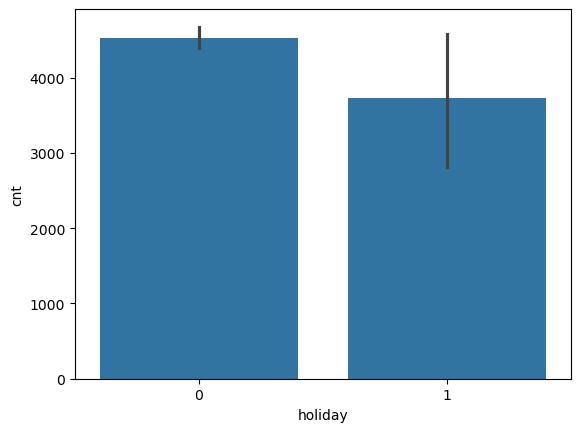

In [29]:
### plot holiday vs cnt
sns.barplot(x='holiday',y='cnt',data=bike)
plt.show()

In [30]:
###cnt is more in holidays.

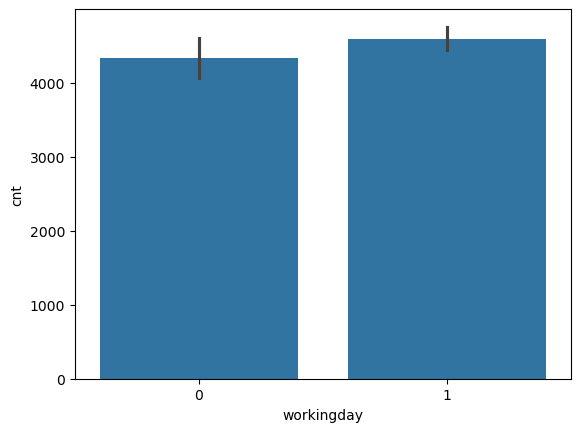

In [31]:
### plot workingday vs cnt
sns.barplot(x='workingday',y='cnt',data=bike)
plt.show()

In [32]:
### cnt is more in workingday.

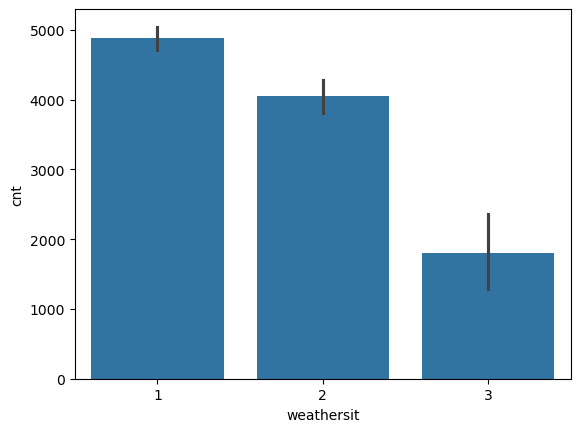

In [33]:
### plot weathersit vs cnt
sns.barplot(x='weathersit',y='cnt',data=bike)
plt.show()

In [34]:
##1: Clear, Few clouds, Partly cloudy, Partly cloudy
##2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
##3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
##4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

##cnt is highest on Clear, Few clouds, Partly cloudy, Partly cloudy weather followed by Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist.cnt 
#is lowest during Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds. We donot have any records for cnt during 
## Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog in our dataset


### Visualizing Categorical Variables

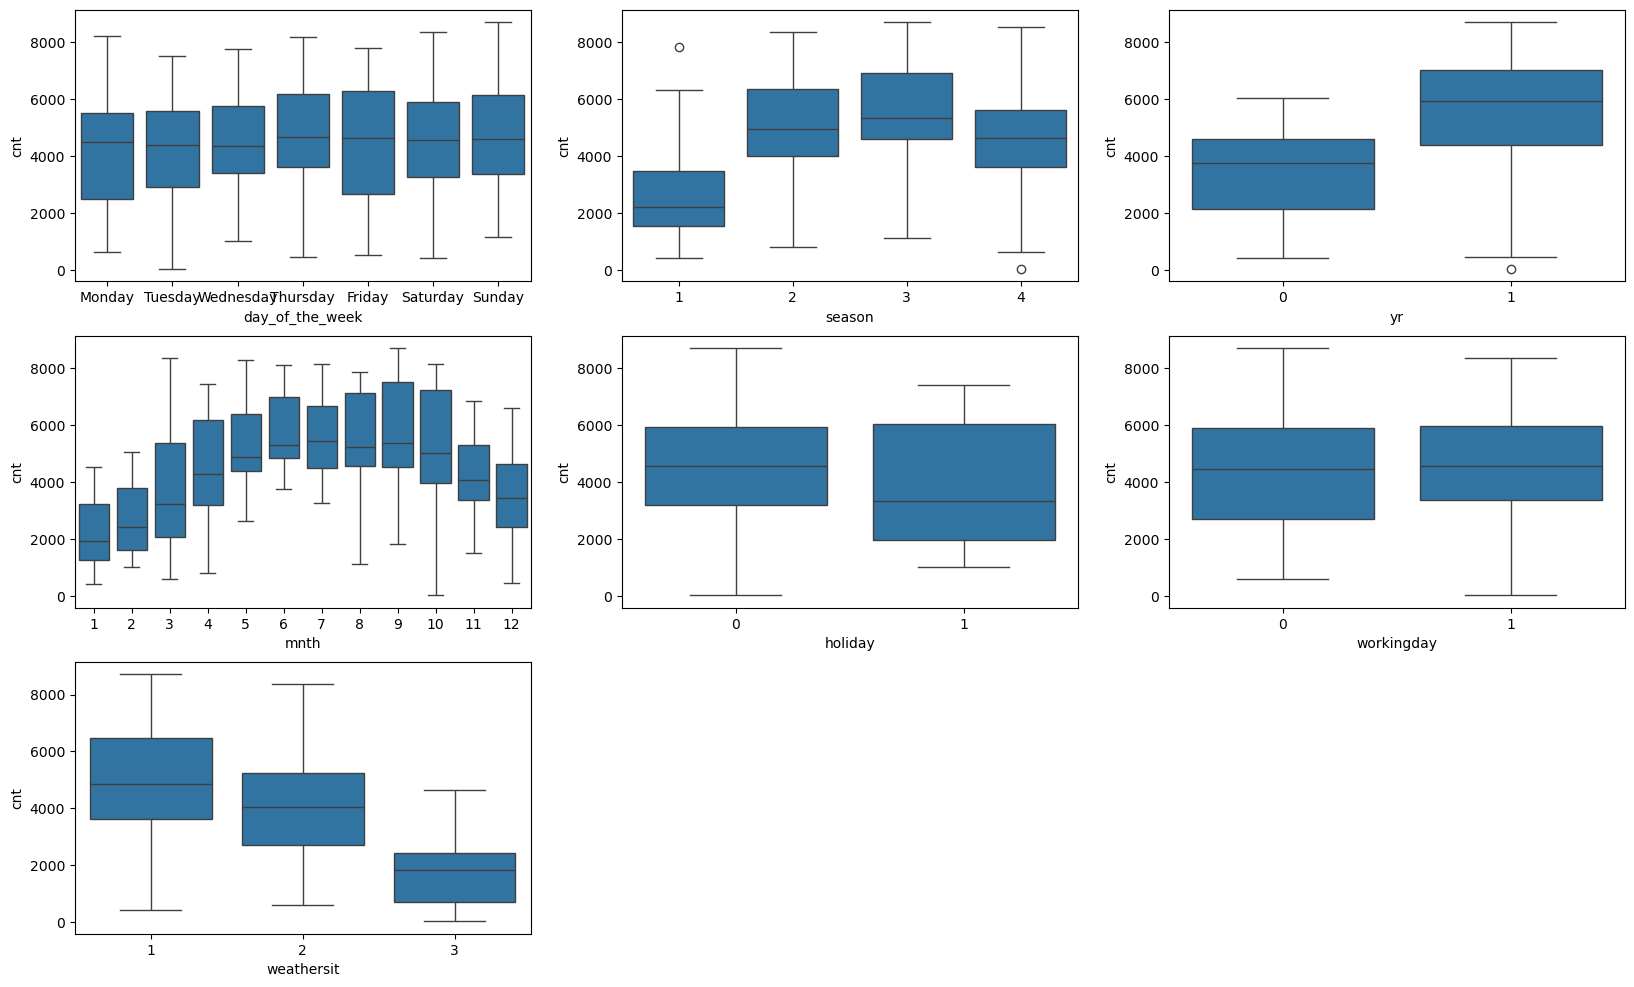

In [35]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'day_of_the_week', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()

In [36]:
### For season 1 which is Clear, Few clouds, Partly cloudy, Partly cloudy seeing some outlines. Other than that no outliners are visible.

### Visualizing the Numeric Variables

In [37]:
### The target variable cnt is the sum of register and causal varaiables. So Registered and casual should not be considered as independent variables.
###dropping this two from dataset

bike=bike.drop(['casual','registered'],axis=1)

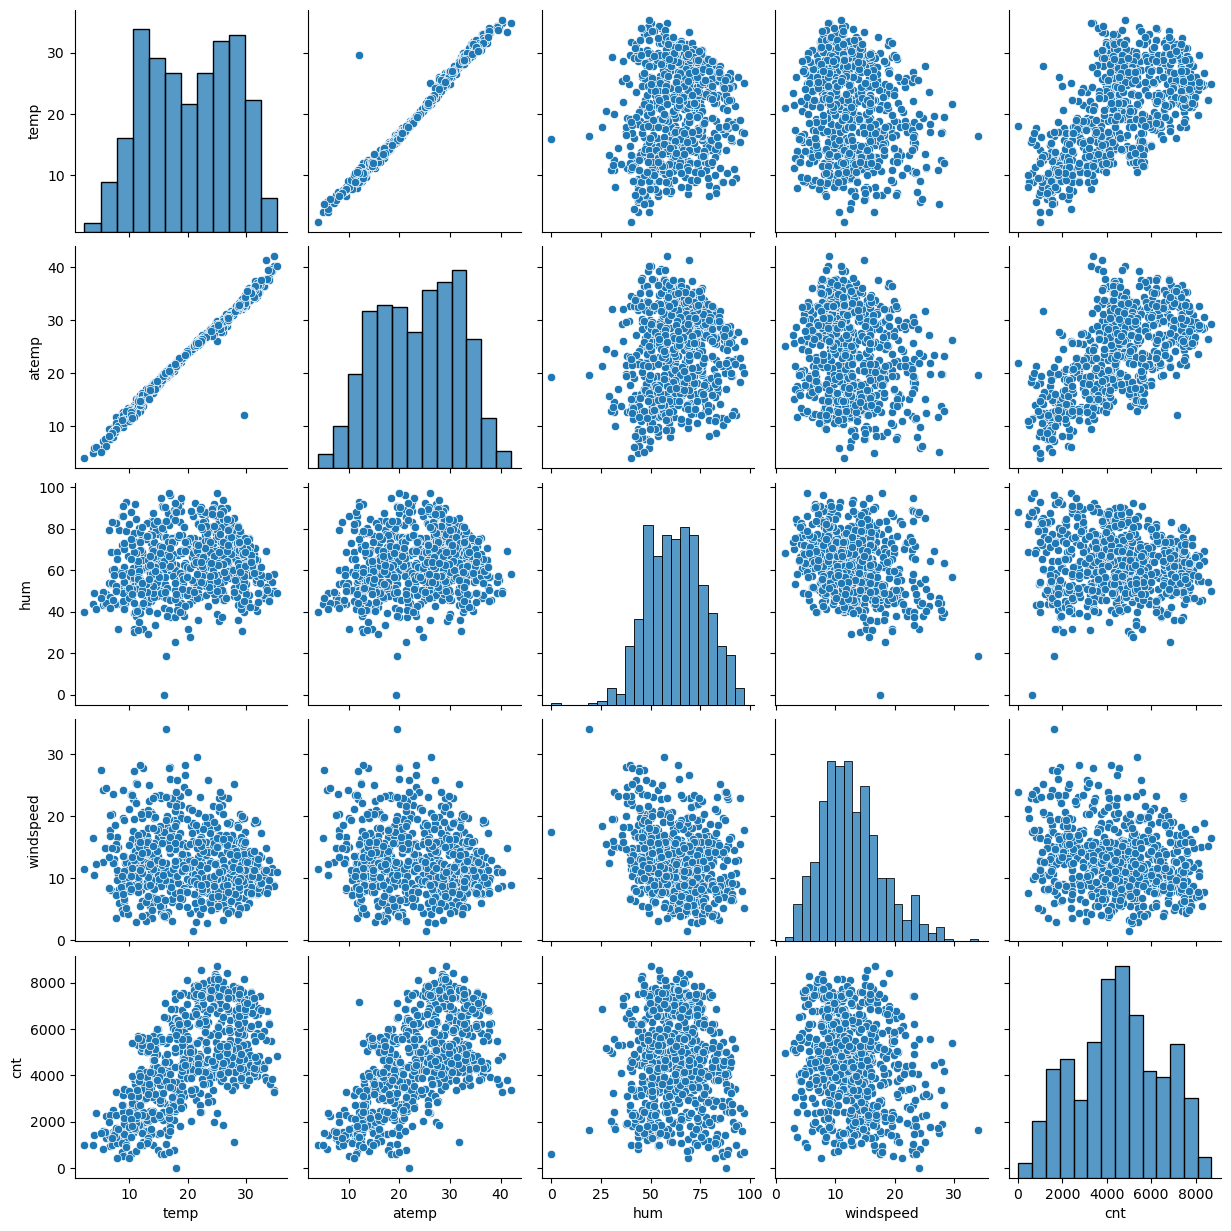

In [38]:
sns.pairplot(data=bike[['temp','atemp','hum','windspeed','cnt']])
plt.show()

In [39]:
### From pairplot we can see high corelation between temp and atemp. Both are dependent variables.
### For target variable cnt we are seeing positive corelation between temp and atemp.

In [40]:
bike[['temp','atemp','hum','windspeed','cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


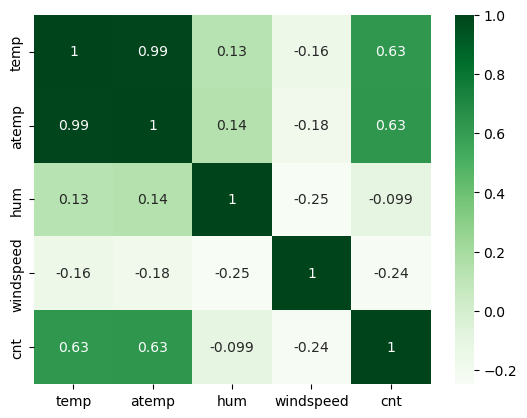

In [41]:
sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(),annot=True,cmap='Greens')
plt.show()

In [42]:
###As temp and atemp are hoghly corelated dependent variables dropping atemp
bike=bike.drop('atemp',axis=1)

### Create dummy Varaibles for categorical variables

In [43]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day_of_the_week
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,Monday
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,Tuesday
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,Wednesday
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,Thursday
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,Friday


In [44]:
bike_1=bike

In [45]:
###Create dummy variables for season
season_status=pd.get_dummies(bike['season'],drop_first=True)
season_status=season_status.rename(columns={2: "season_summer", 3: "season_fall",4:"season_winter"})
bike_1=pd.concat([bike_1,season_status],axis=1)
bike_1=bike_1.drop('season',axis=1)

In [46]:
###Create dummy variables for season
weathersit_status=pd.get_dummies(bike_1['weathersit'],drop_first=True)
weathersit_status=weathersit_status.rename(columns={2: "weathersit_Mist_Cloudy", 3: "weathersit_Ligh_Snow"})
bike_1=pd.concat([bike_1,weathersit_status],axis=1)
bike_1=bike_1.drop('weathersit',axis=1)

In [47]:
###Create dummy variables for mnth
mnth_status=pd.get_dummies(bike_1['mnth'],drop_first=True)
mnth_status=mnth_status.rename(columns={2: "Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})
bike_1=pd.concat([bike_1,mnth_status],axis=1)
bike_1=bike_1.drop('mnth',axis=1)

In [48]:
###Create dummy variables for day_of_the_week
day_of_the_week_status=pd.get_dummies(bike_1['day_of_the_week'],drop_first=True)
bike_1=pd.concat([bike_1,day_of_the_week_status],axis=1)
bike_1

,instant,dteday,yr,holiday,weekday,workingday,temp,hum,windspeed,cnt,...,Sep,Oct,Nov,Dec,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,2018-01-01,0,0,6,0,14.110847,80.5833,10.749882,985,...,False,False,False,False,True,False,False,False,False,False
1,2,2018-01-02,0,0,0,0,14.902598,69.6087,16.652113,801,...,False,False,False,False,False,False,False,False,True,False
2,3,2018-01-03,0,0,1,1,8.050924,43.7273,16.636703,1349,...,False,False,False,False,False,False,False,False,False,True
3,4,2018-01-04,0,0,2,1,8.200000,59.0435,10.739832,1562,...,False,False,False,False,False,False,False,True,False,False
4,5,2018-01-05,0,0,3,1,9.305237,43.6957,12.522300,1600,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,0,4,1,10.420847,65.2917,23.458911,2114,...,False,False,False,True,False,False,False,False,False,False
726,727,2019-12-28,1,0,5,1,10.386653,59.0000,10.416557,3095,...,False,False,False,True,False,True,False,False,False,False
727,728,2019-12-29,1,0,6,0,10.386653,75.2917,8.333661,1341,...,False,False,False,True,False,False,True,False,False,False
728,729,2019-12-30,1,0,0,0,10.489153,48.3333,23.500518,1796,...,False,False,False,True,True,False,False,False,False,False


In [49]:
###Now we will drop dteday,weekday and day_of_the_week column
bike_1=bike_1.drop(['dteday','weekday','day_of_the_week'],axis=1)

In [50]:
bike_1.columns

Index(['instant', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'cnt', 'season_summer', 'season_fall', 'season_winter',
       'weathersit_Mist_Cloudy', 'weathersit_Ligh_Snow', 'Feb', 'Mar', 'Apr',
       'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [51]:
###convert true false to 1,0
varlist=['season_summer', 'season_fall', 'season_winter',
       'weathersit_Mist_Cloudy', 'weathersit_Ligh_Snow','Feb',
       'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
        'Saturday', 'Sunday', 'Thursday','Monday','Tuesday', 'Wednesday']

In [52]:
bike_1[varlist]=bike_1[varlist].apply(lambda x: x.map({True:1,False:0}))

In [53]:
bike_1

,instant,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,...,Sep,Oct,Nov,Dec,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,14.110847,80.5833,10.749882,985,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,0,0,0,14.902598,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,0,0,1,8.050924,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,0,0,1,8.200000,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,0,0,1,9.305237,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,1,0,1,10.420847,65.2917,23.458911,2114,0,0,...,0,0,0,1,0,0,0,0,0,0
726,727,1,0,1,10.386653,59.0000,10.416557,3095,0,0,...,0,0,0,1,0,1,0,0,0,0
727,728,1,0,0,10.386653,75.2917,8.333661,1341,0,0,...,0,0,0,1,0,0,1,0,0,0
728,729,1,0,0,10.489153,48.3333,23.500518,1796,0,0,...,0,0,0,1,1,0,0,0,0,0


In [54]:
### Normally there should be a corleation between season,weathersit,temp,windspeed and humidity. Check that now before proceeding for model building.

<Axes: >

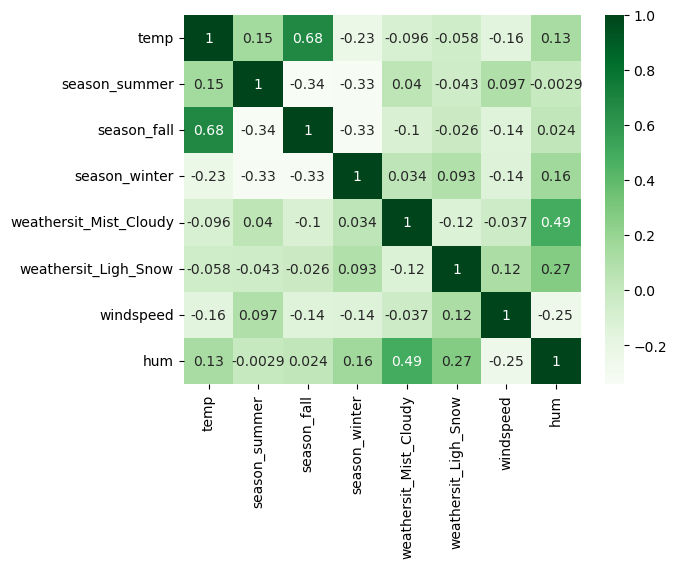

In [55]:
sns.heatmap(bike_1[['temp','season_summer','season_fall','season_winter','weathersit_Mist_Cloudy', 'weathersit_Ligh_Snow','windspeed','hum']].corr(),annot=True,cmap='Greens')

In [56]:
### There is a high corelation between temp and season_fall.
### There is a moderate corelation between weathersit_mist_cloudy and hum.

In [57]:
##Considering that dropping season_fall and weathersit_mist_cloudy
bike_1=bike_1.drop(['season_fall','weathersit_Mist_Cloudy'],axis=1)

<Axes: >

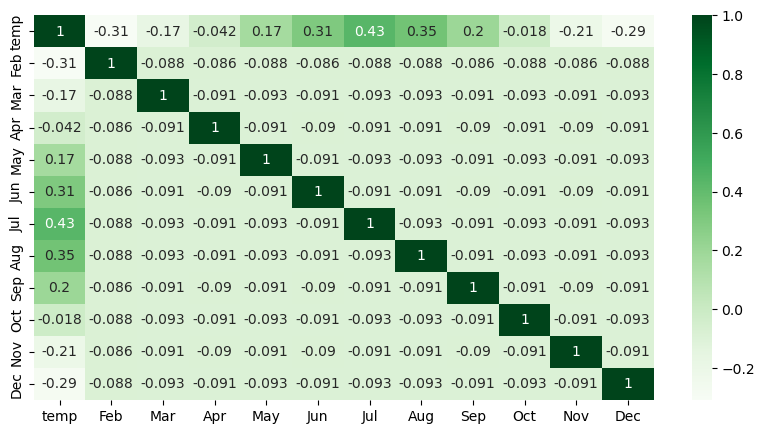

In [58]:
###Check corelation between temp and mnth
plt.figure(figsize=(10,5))
sns.heatmap(bike_1[['temp','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']].corr(),annot=True,cmap='Greens')

In [59]:
###Positive moderate corelation exists between Jul and temp.Dropping Jul
bike_1=bike_1.drop(['Jul'],axis=1)

In [60]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          730 non-null    int64         
 1   dteday           730 non-null    datetime64[ns]
 2   season           730 non-null    int64         
 3   yr               730 non-null    int64         
 4   mnth             730 non-null    int64         
 5   holiday          730 non-null    int64         
 6   weekday          730 non-null    int64         
 7   workingday       730 non-null    int64         
 8   weathersit       730 non-null    int64         
 9   temp             730 non-null    float64       
 10  hum              730 non-null    float64       
 11  windspeed        730 non-null    float64       
 12  cnt              730 non-null    int64         
 13  day_of_the_week  730 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(9)

### Model Building

In [61]:
bike=bike_1

In [62]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   instant               730 non-null    int64  
 1   yr                    730 non-null    int64  
 2   holiday               730 non-null    int64  
 3   workingday            730 non-null    int64  
 4   temp                  730 non-null    float64
 5   hum                   730 non-null    float64
 6   windspeed             730 non-null    float64
 7   cnt                   730 non-null    int64  
 8   season_summer         730 non-null    int64  
 9   season_winter         730 non-null    int64  
 10  weathersit_Ligh_Snow  730 non-null    int64  
 11  Feb                   730 non-null    int64  
 12  Mar                   730 non-null    int64  
 13  Apr                   730 non-null    int64  
 14  May                   730 non-null    int64  
 15  Jun                   7

### Model1

In [63]:
###Also dropping instant columns as it is just index of record.

bike1=bike.drop(['instant'],axis=1)

In [64]:
import sklearn
from sklearn.model_selection import train_test_split

In [65]:
df_train,df_test=train_test_split(bike1,train_size=0.7,test_size=0.3,random_state=42)

In [66]:
df_train.shape,df_test.shape

((510, 26), (219, 26))

In [67]:
###Scaling for faster interpretation
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [68]:
num_vars=['temp','hum','windspeed','cnt']

In [69]:
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [70]:
###X and y split
y_train=df_train.pop('cnt')
X_train=df_train

In [71]:
X_train.shape

(510, 25)

In [72]:
bike_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   instant               730 non-null    int64  
 1   yr                    730 non-null    int64  
 2   holiday               730 non-null    int64  
 3   workingday            730 non-null    int64  
 4   temp                  730 non-null    float64
 5   hum                   730 non-null    float64
 6   windspeed             730 non-null    float64
 7   cnt                   730 non-null    int64  
 8   season_summer         730 non-null    int64  
 9   season_winter         730 non-null    int64  
 10  weathersit_Ligh_Snow  730 non-null    int64  
 11  Feb                   730 non-null    int64  
 12  Mar                   730 non-null    int64  
 13  Apr                   730 non-null    int64  
 14  May                   730 non-null    int64  
 15  Jun                   7

In [73]:
###Apply RFE for the first time for feature selection
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lm=LinearRegression()
rfe=RFE(lm,n_features_to_select=19)
rfe=rfe.fit(X_train,y_train)

In [74]:
list(zip(X_train,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_Ligh_Snow', True, 1),
 ('Feb', False, 4),
 ('Mar', True, 1),
 ('Apr', True, 1),
 ('May', True, 1),
 ('Jun', True, 1),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 5),
 ('Dec', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 2),
 ('Sunday', False, 3),
 ('Thursday', False, 7),
 ('Tuesday', True, 1),
 ('Wednesday', True, 1)]

In [75]:
cols=X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'weathersit_Ligh_Snow', 'Mar', 'Apr', 'May', 'Jun',
       'Aug', 'Sep', 'Oct', 'Dec', 'Monday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [76]:
X_train=X_train[cols]

In [77]:
import statsmodels
import statsmodels.api as sm

In [78]:
X_train_c=sm.add_constant(X_train)
lr_model1= sm.OLS(y_train,X_train_c).fit()
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     124.9
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          5.97e-174
Time:                        08:58:20   Log-Likelihood:                 467.95
No. Observations:                 510   AIC:                            -895.9
Df Residuals:                     490   BIC:                            -811.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2387      0.030      7.879      0.000       0.179       0.298
yr                       0.2306      0.009     25.984      0.000       0.213       0.248
holiday                 -0.0719      0.028     -2.572      0.010      -0.127      -0.017
temp                     0.5887      0.026     22.788      0.000       0.538       0.640
hum                     -0.2931      0.035     -8.440      0.000      -0.361      -0.225
windspeed               -0.1477      0.026     -5.712      0.000      -0.198      -0.097
season_summer            0.0798      0.024      3.321      0.001       0.033       0.127
season_winter            0.1460      0.014     10.566      0.000       0.119       0.173
weathersit_Ligh_Snow    -0.1667      0.028     -6.005      0.000      -0.221      -0.112
Mar                      0.0335      0.022      1.555      0.121      -0.009       0.076
Apr                      0.0308      0.030      1.036      0.301      -0.028       0.089
May                      0.0433      0.030      1.456      0.146      -0.015       0.102
Jun                      0.0119      0.025      0.471      0.638      -0.038       0.061
Aug                      0.0488      0.020      2.443      0.015       0.010       0.088
Sep                      0.1309      0.018      7.380      0.000       0.096       0.166
Oct                      0.0659      0.020      3.362      0.001       0.027       0.104
Dec                     -0.0171      0.019     -0.912      0.362      -0.054       0.020
Monday                  -0.0331      0.013     -2.567      0.011      -0.058      -0.008
Tuesday                 -0.0253      0.013     -1.994      0.047      -0.050      -0.000
Wednesday               -0.0266      0.014     -1.907      0.057      -0.054       0.001
==============================================================================
Omnibus:                       61.978   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.232
Skew:                          -0.772   Prob(JB):                     6.32e-23
Kurtosis:                       4.559   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculate VIF

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,12.54
2,temp,10.73
5,season_summer,7.77
4,windspeed,4.80
10,May,4.28
9,Apr,3.91
11,Jun,2.81
6,season_winter,2.44
0,yr,2.07
14,Oct,1.79


### Model2

#### Now for each model we will check p-values and VIF for each independent variables.

#### And will continue to follow the below approach untill p-value<0.05 and VIF<5 for all independent variables.

#### drop first where p-value is high(even though low VIF)
#### Next drop high VIF(for low p-value)

In [80]:
X_train_eliminate=X_train.pop('Jun')
X_train=X_train
X_train_c=sm.add_constant(X_train)
lr_model2= sm.OLS(y_train,X_train_c).fit()
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     132.0
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          5.72e-175
Time:                        08:58:39   Log-Likelihood:                 467.84
No. Observations:                 510   AIC:                            -897.7
Df Residuals:                     491   BIC:                            -817.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2388      0.030      7.887      0.000       0.179       0.298
yr                       0.2303      0.009     26.045      0.000       0.213       0.248
holiday                 -0.0723      0.028     -2.591      0.010      -0.127      -0.017
temp                     0.5929      0.024     24.455      0.000       0.545       0.641
hum                     -0.2942      0.035     -8.493      0.000      -0.362      -0.226
windspeed               -0.1474      0.026     -5.707      0.000      -0.198      -0.097
season_summer            0.0872      0.018      4.800      0.000       0.051       0.123
season_winter            0.1453      0.014     10.583      0.000       0.118       0.172
weathersit_Ligh_Snow    -0.1669      0.028     -6.017      0.000      -0.221      -0.112
Mar                      0.0296      0.020      1.489      0.137      -0.009       0.069
Apr                      0.0219      0.023      0.954      0.340      -0.023       0.067
May                      0.0339      0.022      1.539      0.124      -0.009       0.077
Aug                      0.0462      0.019      2.409      0.016       0.009       0.084
Sep                      0.1290      0.017      7.484      0.000       0.095       0.163
Oct                      0.0651      0.020      3.337      0.001       0.027       0.103
Dec                     -0.0172      0.019     -0.922      0.357      -0.054       0.019
Monday                  -0.0330      0.013     -2.566      0.011      -0.058      -0.008
Tuesday                 -0.0252      0.013     -1.992      0.047      -0.050      -0.000
Wednesday               -0.0267      0.014     -1.915      0.056      -0.054       0.001
==============================================================================
Omnibus:                       62.246   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.120
Skew:                          -0.777   Prob(JB):                     6.68e-23
Kurtosis:                       4.547   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculate VIF

In [81]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,12.44
2,temp,9.25
4,windspeed,4.80
5,season_summer,4.45
6,season_winter,2.41
10,May,2.35
9,Apr,2.33
0,yr,2.06
13,Oct,1.78
11,Aug,1.43


### Model3

In [82]:
X_train_eliminate=X_train.pop('Dec')
X_train=X_train
X_train_c=sm.add_constant(X_train)
lr_model3= sm.OLS(y_train,X_train_c).fit()
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     139.8
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          7.26e-176
Time:                        08:58:48   Log-Likelihood:                 467.39
No. Observations:                 510   AIC:                            -898.8
Df Residuals:                     492   BIC:                            -822.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2376      0.030      7.855      0.000       0.178       0.297
yr                       0.2298      0.009     26.044      0.000       0.212       0.247
holiday                 -0.0732      0.028     -2.624      0.009      -0.128      -0.018
temp                     0.5969      0.024     25.010      0.000       0.550       0.644
hum                     -0.2984      0.034     -8.695      0.000      -0.366      -0.231
windspeed               -0.1464      0.026     -5.675      0.000      -0.197      -0.096
season_summer            0.0876      0.018      4.830      0.000       0.052       0.123
season_winter            0.1425      0.013     10.644      0.000       0.116       0.169
weathersit_Ligh_Snow    -0.1681      0.028     -6.067      0.000      -0.222      -0.114
Mar                      0.0315      0.020      1.595      0.111      -0.007       0.070
Apr                      0.0229      0.023      1.002      0.317      -0.022       0.068
May                      0.0348      0.022      1.581      0.114      -0.008       0.078
Aug                      0.0469      0.019      2.451      0.015       0.009       0.085
Sep                      0.1312      0.017      7.686      0.000       0.098       0.165
Oct                      0.0700      0.019      3.730      0.000       0.033       0.107
Monday                  -0.0331      0.013     -2.576      0.010      -0.058      -0.008
Tuesday                 -0.0251      0.013     -1.981      0.048      -0.050      -0.000
Wednesday               -0.0264      0.014     -1.893      0.059      -0.054       0.001
==============================================================================
Omnibus:                       62.074   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.019
Skew:                          -0.778   Prob(JB):                     1.16e-22
Kurtosis:                       4.527   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
X_train_c=sm.add_constant(X_train)
lr_model3=sm.OLS(y_train,X_train_c).fit()
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     139.8
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          7.26e-176
Time:                        08:58:49   Log-Likelihood:                 467.39
No. Observations:                 510   AIC:                            -898.8
Df Residuals:                     492   BIC:                            -822.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2376      0.030      7.855      0.000       0.178       0.297
yr                       0.2298      0.009     26.044      0.000       0.212       0.247
holiday                 -0.0732      0.028     -2.624      0.009      -0.128      -0.018
temp                     0.5969      0.024     25.010      0.000       0.550       0.644
hum                     -0.2984      0.034     -8.695      0.000      -0.366      -0.231
windspeed               -0.1464      0.026     -5.675      0.000      -0.197      -0.096
season_summer            0.0876      0.018      4.830      0.000       0.052       0.123
season_winter            0.1425      0.013     10.644      0.000       0.116       0.169
weathersit_Ligh_Snow    -0.1681      0.028     -6.067      0.000      -0.222      -0.114
Mar                      0.0315      0.020      1.595      0.111      -0.007       0.070
Apr                      0.0229      0.023      1.002      0.317      -0.022       0.068
May                      0.0348      0.022      1.581      0.114      -0.008       0.078
Aug                      0.0469      0.019      2.451      0.015       0.009       0.085
Sep                      0.1312      0.017      7.686      0.000       0.098       0.165
Oct                      0.0700      0.019      3.730      0.000       0.033       0.107
Monday                  -0.0331      0.013     -2.576      0.010      -0.058      -0.008
Tuesday                 -0.0251      0.013     -1.981      0.048      -0.050      -0.000
Wednesday               -0.0264      0.014     -1.893      0.059      -0.054       0.001
==============================================================================
Omnibus:                       62.074   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.019
Skew:                          -0.778   Prob(JB):                     1.16e-22
Kurtosis:                       4.527   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,11.66
2,temp,8.97
4,windspeed,4.80
5,season_summer,4.44
10,May,2.34
9,Apr,2.32
6,season_winter,2.28
0,yr,2.05
13,Oct,1.64
11,Aug,1.42


### Model4

In [85]:
X_train_eliminate=X_train.pop('Apr')
X_train=X_train
X_train_c=sm.add_constant(X_train)
lr_model4= sm.OLS(y_train,X_train_c).fit()
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     148.5
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          9.65e-177
Time:                        08:58:59   Log-Likelihood:                 466.88
No. Observations:                 510   AIC:                            -899.8
Df Residuals:                     493   BIC:                            -827.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2383      0.030      7.883      0.000       0.179       0.298
yr                       0.2299      0.009     26.065      0.000       0.213       0.247
holiday                 -0.0727      0.028     -2.606      0.009      -0.127      -0.018
temp                     0.5925      0.023     25.254      0.000       0.546       0.639
hum                     -0.2975      0.034     -8.671      0.000      -0.365      -0.230
windspeed               -0.1435      0.026     -5.597      0.000      -0.194      -0.093
season_summer            0.0999      0.013      7.479      0.000       0.074       0.126
season_winter            0.1417      0.013     10.603      0.000       0.115       0.168
weathersit_Ligh_Snow    -0.1680      0.028     -6.063      0.000      -0.222      -0.114
Mar                      0.0260      0.019      1.371      0.171      -0.011       0.063
May                      0.0228      0.018      1.235      0.218      -0.013       0.059
Aug                      0.0479      0.019      2.506      0.013       0.010       0.085
Sep                      0.1319      0.017      7.737      0.000       0.098       0.165
Oct                      0.0706      0.019      3.764      0.000       0.034       0.108
Monday                  -0.0330      0.013     -2.567      0.011      -0.058      -0.008
Tuesday                 -0.0250      0.013     -1.977      0.049      -0.050      -0.000
Wednesday               -0.0268      0.014     -1.925      0.055      -0.054       0.001
==============================================================================
Omnibus:                       62.267   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.619
Skew:                          -0.779   Prob(JB):                     8.58e-23
Kurtosis:                       4.534   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,11.60
2,temp,8.65
4,windspeed,4.68
5,season_summer,2.41
6,season_winter,2.27
0,yr,2.04
9,May,1.64
12,Oct,1.64
10,Aug,1.42
15,Wednesday,1.36


### Model5

In [87]:
X_train_eliminate=X_train.pop('May')
X_train=X_train
X_train_c=sm.add_constant(X_train)
lr_model5= sm.OLS(y_train,X_train_c).fit()
lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     158.1
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          1.61e-177
Time:                        08:59:16   Log-Likelihood:                 466.09
No. Observations:                 510   AIC:                            -900.2
Df Residuals:                     494   BIC:                            -832.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2354      0.030      7.806      0.000       0.176       0.295
yr                       0.2303      0.009     26.100      0.000       0.213       0.248
holiday                 -0.0725      0.028     -2.598      0.010      -0.127      -0.018
temp                     0.5937      0.023     25.319      0.000       0.548       0.640
hum                     -0.2919      0.034     -8.578      0.000      -0.359      -0.225
windspeed               -0.1450      0.026     -5.659      0.000      -0.195      -0.095
season_summer            0.1078      0.012      9.150      0.000       0.085       0.131
season_winter            0.1412      0.013     10.565      0.000       0.115       0.167
weathersit_Ligh_Snow    -0.1701      0.028     -6.150      0.000      -0.224      -0.116
Mar                      0.0228      0.019      1.210      0.227      -0.014       0.060
Aug                      0.0467      0.019      2.444      0.015       0.009       0.084
Sep                      0.1306      0.017      7.672      0.000       0.097       0.164
Oct                      0.0701      0.019      3.736      0.000       0.033       0.107
Monday                  -0.0337      0.013     -2.623      0.009      -0.059      -0.008
Tuesday                 -0.0256      0.013     -2.022      0.044      -0.050      -0.001
Wednesday               -0.0269      0.014     -1.932      0.054      -0.054       0.000
==============================================================================
Omnibus:                       61.540   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.043
Skew:                          -0.782   Prob(JB):                     5.13e-22
Kurtosis:                       4.473   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,11.46
2,temp,8.65
4,windspeed,4.61
6,season_winter,2.27
0,yr,2.04
5,season_summer,1.87
11,Oct,1.64
9,Aug,1.42
14,Wednesday,1.36
10,Sep,1.34


### Model6

In [89]:
X_train_eliminate=X_train.pop('Mar')
X_train=X_train
X_train_c=sm.add_constant(X_train)
lr_model6= sm.OLS(y_train,X_train_c).fit()
lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     169.1
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          2.51e-178
Time:                        08:59:23   Log-Likelihood:                 465.33
No. Observations:                 510   AIC:                            -900.7
Df Residuals:                     495   BIC:                            -837.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2406      0.030      8.057      0.000       0.182       0.299
yr                       0.2305      0.009     26.115      0.000       0.213       0.248
holiday                 -0.0736      0.028     -2.639      0.009      -0.128      -0.019
temp                     0.5894      0.023     25.418      0.000       0.544       0.635
hum                     -0.2917      0.034     -8.568      0.000      -0.359      -0.225
windspeed               -0.1459      0.026     -5.695      0.000      -0.196      -0.096
season_summer            0.1081      0.012      9.173      0.000       0.085       0.131
season_winter            0.1384      0.013     10.506      0.000       0.113       0.164
weathersit_Ligh_Snow    -0.1686      0.028     -6.099      0.000      -0.223      -0.114
Aug                      0.0456      0.019      2.390      0.017       0.008       0.083
Sep                      0.1297      0.017      7.622      0.000       0.096       0.163
Oct                      0.0706      0.019      3.760      0.000       0.034       0.107
Monday                  -0.0353      0.013     -2.755      0.006      -0.060      -0.010
Tuesday                 -0.0260      0.013     -2.054      0.041      -0.051      -0.001
Wednesday               -0.0288      0.014     -2.076      0.038      -0.056      -0.002
==============================================================================
Omnibus:                       60.608   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.256
Skew:                          -0.769   Prob(JB):                     7.61e-22
Kurtosis:                       4.488   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:

vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,11.10
2,temp,8.56
4,windspeed,4.59
6,season_winter,2.22
0,yr,2.04
5,season_summer,1.87
10,Oct,1.64
8,Aug,1.41
9,Sep,1.34
13,Wednesday,1.34


### Model7

In [91]:
X_train_eliminate=X_train.pop('hum')
X_train=X_train
X_train_c=sm.add_constant(X_train)
lr_model7= sm.OLS(y_train,X_train_c).fit()
lr_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     154.0
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          1.20e-164
Time:                        08:59:34   Log-Likelihood:                 430.07
No. Observations:                 510   AIC:                            -832.1
Df Residuals:                     496   BIC:                            -772.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0437      0.020      2.140      0.033       0.004       0.084
yr                       0.2376      0.009     25.266      0.000       0.219       0.256
holiday                 -0.0681      0.030     -2.279      0.023      -0.127      -0.009
temp                     0.5752      0.025     23.230      0.000       0.527       0.624
windspeed               -0.0894      0.027     -3.374      0.001      -0.142      -0.037
season_summer            0.1004      0.013      7.982      0.000       0.076       0.125
season_winter            0.1283      0.014      9.134      0.000       0.101       0.156
weathersit_Ligh_Snow    -0.2375      0.028     -8.385      0.000      -0.293      -0.182
Aug                      0.0354      0.020      1.734      0.084      -0.005       0.075
Sep                      0.1076      0.018      5.976      0.000       0.072       0.143
Oct                      0.0592      0.020      2.954      0.003       0.020       0.099
Monday                  -0.0370      0.014     -2.699      0.007      -0.064      -0.010
Tuesday                 -0.0348      0.014     -2.576      0.010      -0.061      -0.008
Wednesday               -0.0388      0.015     -2.621      0.009      -0.068      -0.010
==============================================================================
Omnibus:                       58.807   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.359
Skew:                          -0.763   Prob(JB):                     1.45e-20
Kurtosis:                       4.403   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.28
3,windspeed,3.89
0,yr,2.02
5,season_winter,1.96
4,season_summer,1.86
9,Oct,1.63
7,Aug,1.41
8,Sep,1.33
12,Wednesday,1.32
11,Tuesday,1.28


### Model8

In [93]:
X_train_eliminate=X_train.pop('Aug')
X_train=X_train
X_train_c=sm.add_constant(X_train)
lr_model8= sm.OLS(y_train,X_train_c).fit()
lr_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     165.9
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          4.06e-165
Time:                        08:59:36   Log-Likelihood:                 428.53
No. Observations:                 510   AIC:                            -831.1
Df Residuals:                     497   BIC:                            -776.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0414      0.020      2.027      0.043       0.001       0.081
yr                       0.2369      0.009     25.164      0.000       0.218       0.255
holiday                 -0.0700      0.030     -2.341      0.020      -0.129      -0.011
temp                     0.5912      0.023     25.687      0.000       0.546       0.636
windspeed               -0.0893      0.027     -3.362      0.001      -0.141      -0.037
season_summer            0.0930      0.012      7.843      0.000       0.070       0.116
season_winter            0.1253      0.014      8.971      0.000       0.098       0.153
weathersit_Ligh_Snow    -0.2383      0.028     -8.398      0.000      -0.294      -0.183
Sep                      0.0997      0.017      5.712      0.000       0.065       0.134
Oct                      0.0561      0.020      2.805      0.005       0.017       0.095
Monday                  -0.0362      0.014     -2.641      0.009      -0.063      -0.009
Tuesday                 -0.0351      0.014     -2.590      0.010      -0.062      -0.008
Wednesday               -0.0383      0.015     -2.587      0.010      -0.067      -0.009
==============================================================================
Omnibus:                       57.903   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.186
Skew:                          -0.768   Prob(JB):                     1.17e-19
Kurtosis:                       4.321   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.20
3,windspeed,3.88
0,yr,2.01
5,season_winter,1.91
4,season_summer,1.64
8,Oct,1.62
11,Wednesday,1.32
10,Tuesday,1.28
7,Sep,1.25
9,Monday,1.25


In [95]:
### So for the above model we rae seeing for all variables p-value<0.05
### and VIF<5

### Residual Analysis

In [96]:
###our final model is lr_model8

In [97]:
lr_model=lr_model8


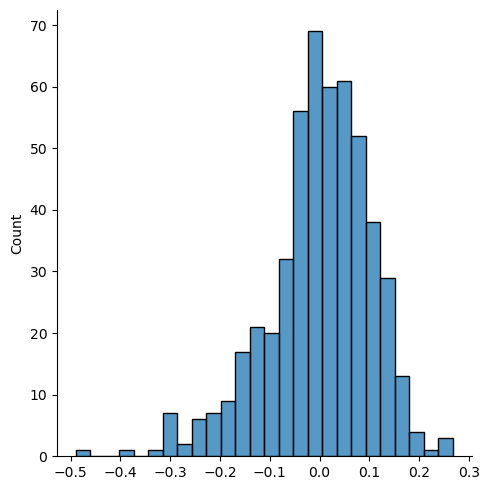

In [98]:
y_train_pred=lr_model.predict(X_train_c)
res=y_train-y_train_pred
sns.displot(res)

In [99]:
num_vars=['temp','hum','windspeed','cnt']
df_test[num_vars]= scaler.transform(df_test[num_vars])

In [100]:
y_test=df_test.pop('cnt')
X_test=df_test

In [101]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_winter,weathersit_Ligh_Snow,Feb,...,Sep,Oct,Nov,Dec,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
468,1,0,0,0.543115,0.518248,0.422104,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
148,0,0,0,0.758058,0.843709,0.479765,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
302,0,0,0,0.324018,0.642765,0.386287,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
355,0,0,1,0.453814,0.780592,0.062325,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
515,1,0,1,0.773634,0.507943,0.433030,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
X_train.head()

,yr,holiday,temp,windspeed,season_summer,season_winter,weathersit_Ligh_Snow,Sep,Oct,Monday,Tuesday,Wednesday
683,1,0,0.327133,0.327101,0,1,0,0,0,0,0,0
645,1,1,0.403972,0.419004,0,1,0,0,1,0,1,0
163,0,0,0.717562,0.708724,1,0,0,0,0,0,0,1
360,0,0,0.331287,0.415925,0,0,0,0,0,0,0,0
640,1,0,0.745598,0.110593,0,1,0,0,1,0,0,0


In [103]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'weathersit_Ligh_Snow', 'Feb', 'Mar',
       'Apr', 'May', 'Jun', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [104]:
X_test=X_test.drop(['workingday','hum',
        'Feb', 'Mar',
       'Apr', 'May', 'Jun', 'Aug', 'Nov', 'Dec',
       'Saturday', 'Sunday', 'Thursday'],axis=1)

In [105]:
X_test_c=sm.add_constant(X_test)

In [106]:
y_test_pred=lr_model.predict(X_test_c)

In [107]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test,y_pred=y_test_pred)

0.792016193622308

### Model Evalution

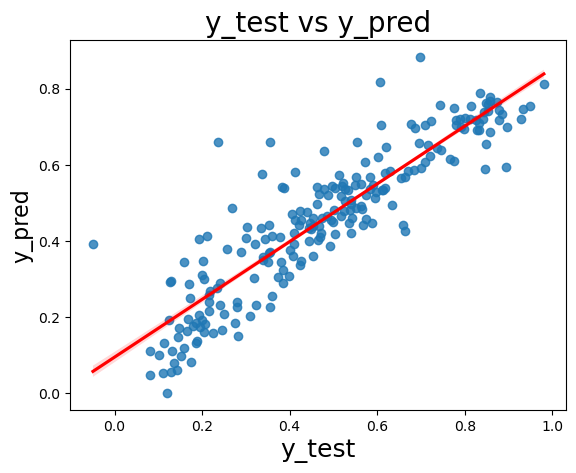

In [108]:
plt.figure()
sns.regplot(x=y_test, y=y_test_pred,ci=60,line_kws={'color':'red'})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [109]:
lr_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     165.9
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          4.06e-165
Time:                        08:59:55   Log-Likelihood:                 428.53
No. Observations:                 510   AIC:                            -831.1
Df Residuals:                     497   BIC:                            -776.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0414      0.020      2.027      0.043       0.001       0.081
yr                       0.2369      0.009     25.164      0.000       0.218       0.255
holiday                 -0.0700      0.030     -2.341      0.020      -0.129      -0.011
temp                     0.5912      0.023     25.687      0.000       0.546       0.636
windspeed               -0.0893      0.027     -3.362      0.001      -0.141      -0.037
season_summer            0.0930      0.012      7.843      0.000       0.070       0.116
season_winter            0.1253      0.014      8.971      0.000       0.098       0.153
weathersit_Ligh_Snow    -0.2383      0.028     -8.398      0.000      -0.294      -0.183
Sep                      0.0997      0.017      5.712      0.000       0.065       0.134
Oct                      0.0561      0.020      2.805      0.005       0.017       0.095
Monday                  -0.0362      0.014     -2.641      0.009      -0.063      -0.009
Tuesday                 -0.0351      0.014     -2.590      0.010      -0.062      -0.008
Wednesday               -0.0383      0.015     -2.587      0.010      -0.067      -0.009
==============================================================================
Omnibus:                       57.903   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.186
Skew:                          -0.768   Prob(JB):                     1.17e-19
Kurtosis:                       4.321   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### So the linear equation of cnt is as below for this model

cnt= 0.0414 + 0.2369 * yr - 0.0700 * holiday + 0.5912 * temp -0.0893 * windspeed + 0.0930 * season_summer + 0.1253 * season_winter -0.2383 * weathersit_Ligh_Snow + 0.0997 * Sep + 0.0561 * Oct -0.0362 * Monday -0.0351 * Tuesday -0.0383 * Wednesday

### Conclusion

- yr-  There is sigficant rise of cnt in 2019 compared to 2018. yr-2019 has a significant imapct on the demand of shared bikes.

- holiday- holiday has negative imapct on the demand of shared bikes.


- temp- temp has significant positive imapct on the demand of shared bikes.

- windspeed - windspeed has negative imapct on the demand of shared bikes.

- season_summer and season_winter- season_summer and season_winter have positive imapct on the demand of shared bikes.

- weathersit_Ligh_Snow - weathersit_Ligh_Snow has negative impact one shared bike.

- mnth-  Sep and Oct have positive imapct on shared bike price.

- day - Monday,Tuesday,Wednesday have negative impact on the demand of shared bikes.
